# Á¨¨ÂÖ≠ÈÄ±: Ëã±ÊñáÊñáÈõÜÁöÑÊÉÖÁ∑íÂàÜÊûê2

**Author:** ÂäâÂ≤±ÂÆú<br>
**Date created:** 2021/09/21<br>
**Last modified:** 2020/09/21<br>
+ Ë≥áÊñô‰æÜÊ∫ê:
    + twitter api Áà¨ÂèñË≤ºÊñá
    + ÈóúÈçµÂ≠ó:„ÄåCOVID19vaccine„Äç(3000Á≠Ü)
    + ÊôÇÈñì: "2021-09-15" Âà∞ "2021-09-20"
+ ÂàÜÊûêÊñπÂºè
    + POS„ÄÅNER„ÄÅsentiment coreNLP
+ ÂàÜÊûêÊµÅÁ®ã
    + 1. coreNLP ‰ªãÁ¥π
    + 2. ÊñáÁ´†ÊäìÂèñ & coreNLP Ê®ôË®ª
        + 1. ÊäìÂèñtwitterË≤ºÊñá
        + 2. coreNLP Êñ∑Ë©ûÊì∑ÂèñPOS„ÄÅNER„ÄÅsentiment
    + 3. ÈñãÂßãÂàÜÊûê
        + 1. NER„ÄÅPOSÁõ∏ÈóúÂàÜÊûê
        + 2. ÂàÜÊûêÊÉÖÁ∑íÔºåÂäÉÂá∫Êó•ÊúüÊÉÖÁ∑íË∂®Âã¢ËàáÁõ∏ÈóúÂ≠óË©û

In [61]:
import stanza ## pip install stanza
from stanza.server import CoreNLPClient
from ipywidgets import IntProgress ## pip install ipywidgets

import os
import time
import pandas as pd

from nltk.parse import CoreNLPParser
from nltk.parse.corenlp import *
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS ## pip install wordcloud

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt

## Part 1ÔºöcoreNLP‰ªãÁ¥π

### ‰∏ãËºâcoreNLP Â•ó‰ª∂
+ ÂèØ‰ª•Áî®stanzaÁÆ°ÁêÜNLPÁöÑÁõ∏ÈóúÊ®°Âûã

In [2]:
stanza.install_corenlp("./stanza_corenlp") # ‰∏ãËºâcoreNLPÊ®°ÂûãÔºåÈ†êË®≠ÊúÉÂú®/stanza_corenlpË£°Èù¢

2021-09-22 12:00:30 WARNING: Directory ./stanza_corenlp already exists. Please install CoreNLP to a new directory.


In [3]:

os.environ['CORENLP_HOME'] = "./stanza_corenlp"

### ÈñãÂïüCoreNLP client Á´Ø

+ ÊØèÊ¨°‰ΩøÁî®CoreNLPÂ•ó‰ª∂Â∞±ÈúÄË¶ÅÈñãÂïüClient
+ ÂèØ‰ª•Ë®≠ÂÆöÁõ∏ÈóúÁöÑportÂíåËôïÁêÜÁöÑmemoryÂ§ßÂ∞è
+ Ë®òÂæóÊØèÊ¨°ÈñãËµ∑‰æÜ‰πãÂæåË¶ÅÊääclientÈóúÊéâÔºåÂèØ‰ª•Áî®withË™ûÊ≥ïÁ¢∫‰øùÊØèÊ¨°Âü∑Ë°åÂÆåËá™Â∑±ÈóúÊéâ
    
‰ª•‰∏ãÁî®Á∞°ÂñÆÁöÑÁØÑ‰æãË™™Êòé

In [4]:
# Ë®≠ÂÆö CoreNLPClient with some basic annotators, a memory allocation of 4GB, and port number 9000
client = CoreNLPClient(
             # clientË¶ÅËôïÁêÜÁöÑÈ†ÖÁõÆ
            annotators=['tokenize','ssplit','sentiment'],     
            memory='4G', 
            endpoint='http://localhost:9008',
            be_quiet=True
        )

# Start the background server and wait for some time
# Note that in practice this is totally optional, as by default the server will be started when the first annotation is performed
client.start()
import time; time.sleep(5)

2021-09-22 12:00:32 INFO: Writing properties to tmp file: corenlp_server-cceef8ab5daf4243.props
2021-09-22 12:00:32 INFO: Starting server with command: java -Xmx4G -cp ./stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9008 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-cceef8ab5daf4243.props -annotators tokenize,ssplit,sentiment -preload -outputFormat serialized


In [5]:
# Â∞áË¶ÅÂàÜÊûêÁöÑÂ≠ó‰∏≤ÂÇ≥ÂÖ•clientÔºåÂæóÂà∞coreNLPÁöÑdocument object
text = 'A blog post using Stanford CoreNLP Server. Visit www.khalidalnajjar.com for more details.'
document = client.annotate(text)
print(type(document))

<class 'CoreNLP_pb2.Document'>


In [6]:
# text ÊúÉË¢´ÂàÜÊàêÂÄãÂè•Â≠êÔºåÁî®forËø¥ÂúàÊääÊØèÂÄãÂ≠óÂèñÂá∫‰æÜÔºåÁúãÁúãÂ∞çÊáâÁöÑ lemma, pos and ner tags Ê®ôÁ±§
print(f"{'Word':12s}\t{'Lemma':12s}\t{'POS':6s}\t{'NER'}")  
    
for i, sent in enumerate(document.sentence): 
    for t in sent.token:
        print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
    print("")

Word        	Lemma       	POS   	NER
A           	            	DT    	
blog        	            	NN    	
post        	            	NN    	
using       	            	VBG   	
Stanford    	            	NNP   	
CoreNLP     	            	NN    	
Server      	            	NN    	
.           	            	.     	

Visit       	            	VB    	
www.khalidalnajjar.com	            	ADD   	
for         	            	IN    	
more        	            	JJR   	
details     	            	NNS   	
.           	            	.     	



In [7]:
for i, sent in enumerate(document.sentence):
    
    # get the constituency parse of the sentence
    constituency_parse = sent.parseTree # child 
    print(constituency_parse)

    # get the dependency parse of the first sentence
    dependency_parse = sent.basicDependencies # edge
    print(dependency_parse)    

child {
  child {
    child {
      child {
        value: "A"
      }
      value: "DT"
      score: -4.670736789703369
    }
    child {
      child {
        value: "blog"
      }
      value: "NN"
      score: -9.66670036315918
    }
    child {
      child {
        value: "post"
      }
      value: "NN"
      score: -7.835064888000488
    }
    value: "NP"
    score: -26.095684051513672
  }
  child {
    child {
      child {
        value: "using"
      }
      value: "VBG"
      score: -3.688901901245117
    }
    child {
      child {
        child {
          value: "Stanford"
        }
        value: "NNP"
        score: -9.325450897216797
      }
      child {
        child {
          value: "CoreNLP"
        }
        value: "NN"
        score: -16.279035568237305
      }
      child {
        child {
          value: "Server"
        }
        value: "NN"
        score: -12.386455535888672
      }
      value: "NP"
      score: -47.03589630126953
    }
    value: "VP"
 

In [8]:
# ÊúÄÂæåÂÜçÊääËÉåÊôØÁöÑclientÈóúÊéâ
client.stop()
time.sleep(5)
!ps -o pid,cmd | grep java

28369 /bin/bash -c ps -o pid,cmd | grep java
28371 grep java


#### Dependency Ë¶ñË¶∫Âåñ
+ ÂÆòÁ∂≤ÁØÑ‰æã: https://corenlp.run/

ÈúÄË¶ÅÂà©Áî®terminal‰∏ãÊåá‰ª§ÊääcoreNLPÈñãËµ∑‰æÜ
1. cd ÈÄèÈÅéstanzaÂ•ó‰ª∂‰∏ãËºâcorenlpÊ®°ÂûãÁöÑË≥áÊñôÂ§æ `./stanza_corenlp`
2. Áî®javaÊåá‰ª§ÊääCoreNLÊúçÂãôÊâìÈñã<br/>`java -mx1g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9010 -timeout 15000`

In [9]:

parser = CoreNLPParser('http://localhost:9010')
text = 'the quick brown fox jumps over the lazy dog'
parser.raw_parse(text)

fox_parsed = next(parser.raw_parse(text))
fox_parsed.pretty_print()

                     ROOT                      
                      |                         
                      S                        
       _______________|_________                
      |                         VP             
      |                _________|___            
      |               |             PP         
      |               |     ________|___        
      NP              |    |            NP     
  ____|__________     |    |     _______|____   
 DT   JJ    JJ   NN  VBZ   IN   DT      JJ   NN
 |    |     |    |    |    |    |       |    |  
the quick brown fox jumps over the     lazy dog



## Part 2ÔºöÂ∞áÂàÜÊûêÈÅéÁ®ã‰∏≤Ëµ∑‰æÜ

### Step 1ÔºöÁî®twitterÊäìË≥áÊñô
+ È¶ñÂÖàÁî≥Ë´ãtwitter Áõ∏ÈóúÁöÑ token secret
+ https://developer.twitter.com/en/docs/tutorials/step-by-step-guide-to-making-your-first-request-to-the-twitter-api-v2
+ Áî≥Ë´ãÂÆå‰πãÂæåtokenÊúÉÂú® Developer Portal > project & Apps > Keys and tokens

In [10]:
import tweepy as tw # pip install tweepy
# API Key and Secret
CONSUMER_KEY = 'eNMQchTiHN7WjnQksfvHAJgA9'
CONSUMER_SECRET = 'MS5xRYuRUERepYaSeABsNjREf9Fvthr7ihsrtswYqBm51GTvPB'
# Access Token and Secret
OAUTH_TOKEN = '1193849843279511552-dXvAjOpZjXFI5BTDLZBW5Ljq551OG1'
OAUTH_TOKEN_SECRET = 'wWGtd0HmThSgHh5Gdi1VDrVRATm1sHJpMi3gcFBC1qxGT'

In [11]:
# ÈñãÈÄöapiÊ¨äÈôê
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

In [12]:
# Â∞áÊäìÂà∞ÁöÑtwitterÊñáÁ´†ËΩâÁÇ∫datafranme

def twitter_table(keyword, from_date,end_date, lang_type,limit):
    
    # ÂÆöÁæ© search api ÂèÉÊï∏
    all_tweets = tw.Cursor(
                        api.search,
                        q=keyword,
                        lang=lang_type,
                        since=from_date,
                        until=end_date
                    ).items(limit)    
    
    # ÊäìÂèñtweetÁöÑ attribute
    tweets_list= [[tweet.created_at, tweet.id, tweet.user.screen_name,
               tweet.user.name, tweet.text, tweet.favorite_count, tweet.retweet_count,tweet.source
              ] for tweet in all_tweets]
    
    # ÂÆöÁæ©Ê¨Ñ‰ΩçÂêçÁ®±
    tweet_table = pd.DataFrame(data=tweets_list, 
                        columns=['created_at','status_id', 'user_id',
                                 'user_name', 'text','favourites', 'retweet','source'])
        
    tweet_table = tweet_table[['created_at','status_id', 'user_id',
                               'user_name', 'text','favourites', 'retweet','source']]
    
    return tweet_table

+ Ë®≠ÂÆöÁà¨ÊñáÁöÑÊ¢ù‰ª∂
    + Ë®≠ÂÆöÊôÇÈñìÁÇ∫ "2021-09-15" Âà∞ "2021-09-20"
    + ÊñáÁ´†È†àÂåÖÂê´ „ÄåCOVID19vaccine„ÄçÈóúÈçµÂ≠óÔºåÁà¨ÊñáÊôÇapiÊúÉÂøΩÁï•Â§ßÂ∞èÂØ´
    + `-filter:retweet` ‰∏çÊäìËΩâÊé®„ÄÅ`-is:reply`‰∏çÊäìÂõûÊñá„ÄÅ`-is:nullcast`‰∏çÊäìÂª£Âëä
    + Êõ¥Â§öquery Ë¶èÂâáÂèØ‰ª•ÂèÉËÄÉÊé®ÁâπÁöÑÊñá‰ª∂
    + https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

In [13]:
keyword = "COVID19vaccine  -filter:retweet -is:reply -is:nullcast" #case-insensitive 
from_date = "2021-09-15"  #format "yyyy-mm-dd"
end_date = "2021-09-20" 
lang_type = "en" 
limit = 3000

In [14]:
# ÈÄèÈÅétwitter apiÊäìÂèñÂ†ÜÊñáÔºåÊúÉÈúÄË¶ÅÁ≠â‰∏ÄÊúÉ
# tweets_df = twitter_table(keyword, from_date,end_date, lang_type,limit)
# tweets_df

In [15]:
# # Â∞áÊé®ÁâπÊñáÁ´†Â≠òÊàêcsv
# tweets_df.to_csv(r'source/eng/tweets_covid19vaccine.csv', index = False)

### Part 2ÔºöÂ∞áÊäìÂèñÁµêÊûúÁî®coreNLP ÂàÜÊûê

In [17]:
def get_nlp_result(tweets_df):    
    
    print("Starting a server with the Python \"with\" statement...")
    
    start = time.time()

    with CoreNLPClient(
        annotators = ['tokenize','ssplit', 'pos', 'lemma', 'ner','sentiment'],
        memory = '4G', endpoint = 'http://localhost:9006' , be_quiet=True, 
    ) as client:
        
        token_list = []        
        senti_list = []        
        
        # Ê≥®ÊÑèÔºÅÔºÅÈÄôË£°Âè™ÊòØÁ§∫ÁØÑÊâÄ‰ª•Âè™Ë∑ë‰∫Ü5Á≠Ü
        for index, row in tweets_df.head(5).iterrows(): # document level    
            # send text into client
            document = client.annotate(row['text'])                
            print(f"{'Word':12s}\t{'Lemma':12s}\t{'POS':6s}\t{'NER'}")               
             # sentence level
            for i, sent in enumerate(document.sentence):
                s = ""
                # token level
                for t in sent.token: 
                    s = s + " " + t.word # for sentence                
                    print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))                
                    temp_token = [row['status_id'],t.word, t.lemma, t.pos, t.ner]           
                    token_list.append(temp_token) 

                print("[Sentence {}:{}_____________]".format(i+1,s))  

                temp_senti = [row['status_id'],s,sent.sentiment]           
                senti_list.append(temp_senti)   

        token_table = pd.DataFrame(data=token_list, 
                            columns=['status_id','word','lemma','pos','ner'])        

        senti_table = pd.DataFrame(data=senti_list, 
                            columns=['status_id','word','sentiment'])        

        end = time.time()

        print("time costing: {}".format(end - start))
        print("\nThe server should be stopped upon exit from the \"with\" statement.")

        return senti_table , token_table

In [18]:
## ËÆÄÂèñÊé®ÁâπÊñáÁ´†
tweets_df = pd.read_csv('./source/eng/tweets_covid19vaccine.csv')

# ÊâæÂá∫NER„ÄÅPOSÂíåsentimentÂàÜÊûêÁµêÊûú
# Ê≥®ÊÑèÔºÅÔºÅÈÄôË£°Âè™ÊòØÁ§∫ÁØÑÊâÄ‰ª•Âè™Ë∑ë‰∫Ü5Á≠Ü
sentiment , tokens = get_nlp_result(tweets_df)
# total time costing: 491.99625301361084

2021-09-22 12:05:08 INFO: Writing properties to tmp file: corenlp_server-978dbd6622aa40ac.props
2021-09-22 12:05:08 INFO: Starting server with command: java -Xmx4G -cp ./stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9006 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-978dbd6622aa40ac.props -annotators tokenize,ssplit,pos,lemma,ner,sentiment -preload -outputFormat serialized


Starting a server with the Python "with" statement...
Word        	Lemma       	POS   	NER
RT          	rt          	NN    	O
@anitakissee	@anitakissee	NN    	HANDLE
:           	:           	:     	O
This        	this        	DT    	O
is          	be          	VBZ   	O
my          	my          	PRP$  	O
favorite    	favorite    	JJ    	O
#Covid19vaccine	#covid19vaccine	NN    	O
video       	video       	NN    	O
on          	on          	IN    	O
TikTok      	TikTok      	NNP   	O
right       	right       	RB    	DATE
now         	now         	RB    	DATE
.           	.           	.     	O
[Sentence 1: RT @anitakissee : This is my favorite #Covid19vaccine video on TikTok right now ._____________]
https://t.co/g4VvHPIX1f	https://t.co/g4vvhpix1f	ADD   	URL
https://t.co/AdzdVE2sBe	https://t.co/adzdve2sbe	ADD   	URL
[Sentence 2: https://t.co/g4VvHPIX1f https://t.co/AdzdVE2sBe_____________]
Word        	Lemma       	POS   	NER
RT          	rt          	NN    	O
@anitakissee	@anitakissee	NN

In [43]:
# ÂÑ≤Â≠òÁµêÊûú
# sentiment.to_csv(r'source/eng/sentiment_covid19vaccine.csv', index = False)
# tokens.to_csv(r'source/eng/tokens_covid19vaccine.csv', index = False)

+ coreNLP_tokens_parserÊ¨Ñ‰Ωç:
    + status_id : Â∞çÊáâÂéüÊú¨dfË£°ÁöÑstatus_idÔºåÁÇ∫‰∏ÄÂâátweetsÁöÑÂîØ‰∏Äid
    + word: ÂéüÂßãÊñ∑Ë©û
    + lemma : Â∞çÊñ∑Ë©ûÂÅöË©ûÂΩ¢ÈÇÑÂéü
    + pos : part-of-speech,Ë©ûÊÄß
    + ner: ÂëΩÂêçÂØ¶È´î

## Part 3ÔºöÂØ¶È´îËæ®Ë≠òÁµêÊûú & ÊÉÖÁ∑íÂàÜÊûê

In [19]:
# ËÆÄÂèñÂ∑≤Á∂ìÂü∑Ë°åÂÆåÁï¢ÁöÑÁµêÊûú
tokens = pd.read_csv('source/eng/tokens_covid19vaccine.csv')
tokens.head(5)

status_id          word         lemma  pos     ner
0  1439740696974409731            RT            rt   NN       O
1  1439740696974409731  @anitakissee  @anitakissee   NN  HANDLE
2  1439740696974409731             :             :    :       O
3  1439740696974409731          This          this   DT       O
4  1439740696974409731            is            be  VBZ       O

### NER Á®ÆÈ°ûÂàÜÊûê
+ ÁúãÁúãÈô§‰∫ÜÂÖ∂‰ªñÔºåÂ§ßÈÉ®ÂàÜÁöÑNERÈÉΩÊòØÂì™‰∏ÄÈ°û

In [20]:
# Êü•ÁúãËæ®Ë≠òÂá∫Âì™ÂπæÁ®ÆNER
tokens['ner'].unique()

array(['O', 'HANDLE', 'DATE', 'URL', 'ORGANIZATION', 'NUMBER', 'MISC',
       'DURATION', 'TITLE', 'PERCENT', 'LOCATION', 'COUNTRY', 'PERSON',
       'CITY', 'ORDINAL', 'STATE_OR_PROVINCE', 'TIME', 'CAUSE_OF_DEATH',
       'NATIONALITY', 'MONEY', 'CRIMINAL_CHARGE', 'RELIGION', 'SET',
       'IDEOLOGY', 'EMAIL'], dtype=object)

In [21]:
# 'O' ‰ª£Ë°® otherÔºåÁúãÁúãÈô§‰∫ÜotherÔºåÊúâÂπæÂÄãÂ≠óÊúâË¢´Ê®ôÂá∫ entity
len(tokens.loc[tokens['ner'] != 'O']['word'].unique()) # 2995ÂÄãÂ≠óÊúâË¢´Ê®ôÂá∫entity

2995

In [22]:
tokens_filter = tokens.loc[tokens['ner'] != 'O']

ner_count = tokens_filter.groupby(['ner'])['ner'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(12)
ner_count

ner  count
7         HANDLE   2572
4           DATE   1795
15  ORGANIZATION   1611
13        NUMBER   1331
23           URL   1238
14       ORDINAL    570
9       LOCATION    513
21          TIME    483
17        PERSON    429
10          MISC    395
1           CITY    370
5       DURATION    228

Text(0.5, 0, 'Frequency')

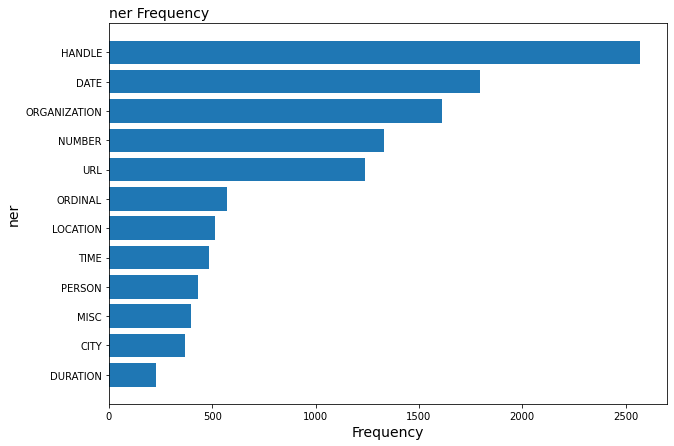

In [23]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)

### Êé¢Á¥¢ÂàÜÊûê - NER

ÁÇ∫‰∫ÜÊ≠£Á¢∫Ë®àÁÆóË©ûÈ†ªÔºåÂ∞áwordËΩâÂ∞èÂØ´Â≠òÊñ∞Ê¨Ñ‰Ωç

In [24]:
tokens['word_lower'] = tokens['word'].str.lower()
tokens['lemma_lower'] = tokens['word'].str.lower()
tokens.head(5)

status_id          word         lemma  pos     ner    word_lower  \
0  1439740696974409731            RT            rt   NN       O            rt   
1  1439740696974409731  @anitakissee  @anitakissee   NN  HANDLE  @anitakissee   
2  1439740696974409731             :             :    :       O             :   
3  1439740696974409731          This          this   DT       O          this   
4  1439740696974409731            is            be  VBZ       O            is   

    lemma_lower  
0            rt  
1  @anitakissee  
2             :  
3          this  
4            is

### Ê∂âÂèäÂà∞ÁöÑÂúãÂÆ∂(COUNTRY)
+ ÈÄèÈÅécoreNLP‰∏≠ÁöÑNERËß£ÊûêÂá∫Âú®Twitter‰∏äÈù¢Ë´áË´ñcovid19ÔºåÊâÄÊ∂âÂèäÂà∞ÁöÑÂúãÂÆ∂(COUNTRY)

In [25]:
# ÁØ©ÈÅ∏nerÁÇ∫countryÁöÑË≥áÊñô
country = tokens.loc[tokens['ner'] == 'COUNTRY']

# Ë®àÁÆóÊØèÂÄãÂúãÂÆ∂ÊèêÂà∞ÁöÑÊ¨°Êï∏ÔºåÈÅ∏Âá∫Ââç13ÂÄã
country_count = country.groupby('word_lower')['word_lower'].agg(['count'])
country_count = country_count.sort_values(['count'],ascending=False)['count'].nlargest(13).reset_index()
country_count.head(5)

word_lower  count
0      india     55
1  australia     17
2      china     14
3       u.s.     13
4     israel      9

In [26]:
# Âè¶Â§ñ‰∏ÄÁ®ÆÂØ´Ê≥ï
country_count = country[['word_lower']].groupby(['word_lower'])['word_lower'] \
                                         .count() \
                                         .reset_index(name='count') \
                                         .sort_values(['count'], ascending=False) \
                                         .head(13)
country_count

word_lower  count
12      india     55
3   australia     17
6       china     14
27       u.s.     13
14     israel      9
23     states      8
30     united      8
17    namibia      8
11    germany      6
19   pakistan      6
22        sri      5
4      canada      5
31         us      5

Text(0.5, 0, 'Word Frequency')

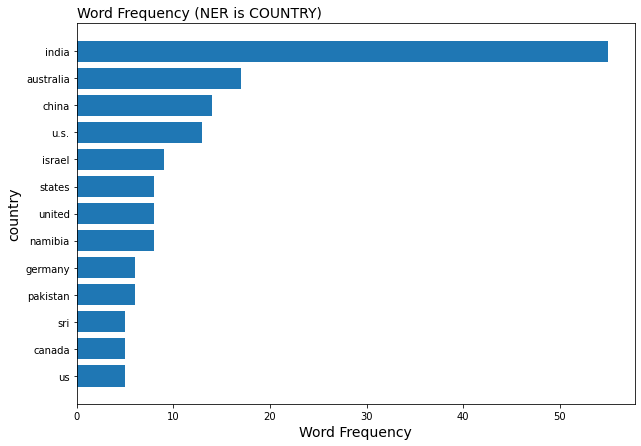

In [27]:

word = country_count['word_lower']
count = country_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is COUNTRY)',loc ='left', size = 14)
ax.set_ylabel('country', size = 14)
ax.set_xlabel('Word Frequency', size = 14)

+ ÂèØ‰ª•ÊäìÂèñÈóúÈçµÂ≠óË≤ºÊñáÔºå‰æÜÁúãÁúãÁõ∏ÈóúÁöÑË≤ºÊñáÂ§ßËá¥Âú®Ë™™ÁîöÈ∫ºÔºå
+ ÊúÄÂ∏∏Âá∫ÁèæÁöÑÂúãÂÆ∂‰æùÂ∫èÂ¶Ç‰∏ãÔºå‰ª•‰∏ãÊåëÂá∫ÂπæÂÄãÊØîËºÉÁâπÂà•ÁöÑ‰∫ã‰ª∂Ôºö
    + Âç∞Â∫¶: WHO ÂèØËÉΩÊúÉÊâπÂáÜÂç∞Â∫¶ÁöÑÂúãÁî¢Áñ´Ëãó Covaxin
    + Êæ≥Ê¥≤: ÊàêÁÇ∫Á¨¨‰∏ÄÂÄãË¶ÅÊ±ÇÈÄ≤ÂÖ•ÂÖ¨ÂÖ±Áî¢ÂíåÈúÄË¶ÅÂá∫Á§∫Áñ´ËãóÊé•Á®ÆË≠âÊòéÁöÑÂúãÂÆ∂
    + ‰∏≠Âúã: Áñ´ËãóÊé•Á®ÆÁéáÈ´òÈÅî 71% ÔºåÊàñÊòØÂÖ∂‰ªñÂúãÂÆ∂Âæû‰∏≠ÂúãË≥ºË≤∑Áñ´ËãóÁöÑÁõ∏ÈóúÊñ∞ËÅû
    + ÁæéÂúã: ÂêÑÁ®ÆÂÆòÊñπÂëºÁ±≤Êé•Á®ÆÁñ´Ëãó„ÄÅÈÖçÂà∞Âè£ÁΩ©ÁöÑÁõ∏ÈóúÂÆ£ÂÇ≥    

### Ê∂âÂèäÂà∞ÁöÑÁµÑÁπî(ORGANIZATION)
+ ÊàëÂÄëÂèØ‰ª•ÈÄèÈÅécoreNLP‰∏≠ÁöÑNERËß£ÊûêÂá∫Âú®Twitter‰∏äÈù¢Ë´áË´ñÊñ∞ÂÜ†ËÇ∫ÁÇéÊôÇÔºåÊâÄÊ∂âÂèäÂà∞ÁöÑÁµÑÁπî(ORGANIZATION)

In [28]:
org = tokens.loc[tokens['ner'] == 'ORGANIZATION']
org_count = org[['word_lower']].groupby(['word_lower'])['word_lower'] \
                                         .count() \
                                         .reset_index(name='count') \
                                         .sort_values(['count'], ascending=False) \
                                         .head(15)
org_count.head(5)

word_lower  count
63        centre     72
1              &     51
201       pfizer     51
226  scarborough     47
17          ajax     37

Text(0.5, 0, 'Word Frequency')

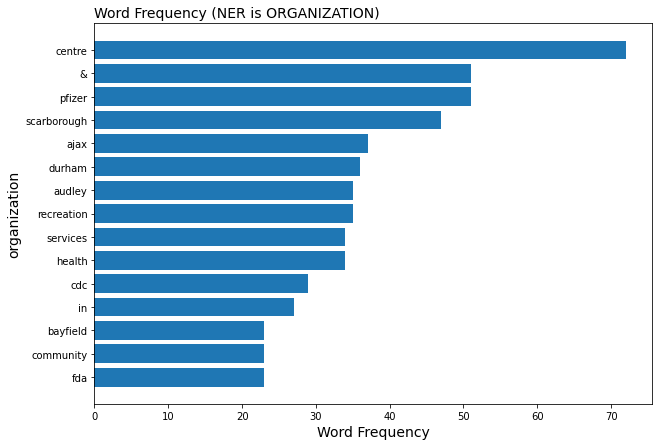

In [29]:
word = org_count['word_lower']
count = org_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORGANIZATION)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)

In [30]:
# Áúã‰∏Ä‰∏ãÂê´ÁâπÂÆöÈóúÈçµÂ≠óÁöÑË≤ºÊñáÂÖßÂÆπ
keyword_list = ['u.s.']
tweets_df[tweets_df['text'].str.contains('|'.join(keyword_list),regex=True)]

created_at            status_id          user_id  \
33    2021-09-19 22:24:19  1439717013941886977     PamO88426052   
59    2021-09-19 20:48:29  1439692898866384896       CPLCdotORG   
91    2021-09-19 19:11:25  1439668468958203905  DEO_MonDistrict   
130   2021-09-19 17:11:45  1439638353108865025       OurGadgets   
155   2021-09-19 16:00:36  1439620448833073152   fellowcreature   
...                   ...                  ...              ...   
2950  2021-09-15 18:10:59  1438203710388281351     RadarsHockey   
2959  2021-09-15 17:55:37  1438199840337498112        RobinFuxa   
2973  2021-09-15 17:39:48  1438195860412813321      RachelSilby   
2981  2021-09-15 17:20:20  1438190961981489152        newsgovhk   
2987  2021-09-15 17:06:08  1438187387960631299  Mississauga_Cal   

                          user_name  \
33                             PamO   
59                             CPLC   
91                     DC & DEO Mon   
130                     Our Gadgets   
155              Fellow Creatures ‚ìã   
...                             ...   
2950               Clinton Radars üò∑   
2959                 Dr. Robin Fuxa   
2973             Rachel Silberstein   
2981  Hong Kong SAR Government News   
2987           Mississauga Calendar   

                                                   text  favourites  retweet  \
33    #COVID19Vaccine \nWhy the hell are people pack...           0        0   
59    RT @pchd: In addition to the static COVID vacc...           0        4   
91    RT @NagalandNhm: Time for Faith and Fact to ha...           0        4   
130   RT @CaringFriendsH2: Get the Covid-19 vaccine ...           0        1   
155   Do anti-vaxxers live their lives taking no ris...           0        0   
...                                                 ...         ...      ...   
2950  RT @CentralHuron: WALK-IN #COVID19Vaccine (Pfi...           0        3   
2959  Keeping it going Oklahoma. If you haven't gott...           4        0   
2973  Not very useful to upstate NYers, but the stat...           0        0   
2981  The two scientific committees under the #Centr...           1        0   
2987  RT @THP_hospital: Looking for a #COVID19vaccin...           0        5   

                   source  
33    Twitter for Android  
59     Twitter for iPhone  
91    Twitter for Android  
130       Twitter Web App  
155   Twitter for Android  
...                   ...  
2950     Twitter for iPad  
2959      Twitter Web App  
2973      Twitter Web App  
2981            newsgovhk  
2987  Twitter for Android  

[256 rows x 8 columns]

+ pfizer: ËºùÁëûË£ΩËó•ÂÖ¨Âè∏
+ fda: ÁæéÂúãÈ£üÂìÅËó•Áâ©ÁÆ°ÁêÜÂ±Ä(ÂèØËÉΩÁÇ∫Áñ´ËãóÁõ∏ÈóúË®éË´ñ)
+ cdc: Centers for Disease Control and Prevention, ÁæéÂúãÁñæÁóÖÁÆ°Âà∂ËàáÈ†êÈò≤‰∏≠ÂøÉ

### Ê∂âÂèäÂà∞ÁöÑ‰∫∫Áâ©(PERSON)
+ ÊàëÂÄëÂèØ‰ª•ÈÄèÈÅécoreNLP‰∏≠ÁöÑNERËß£ÊûêÂá∫Âú®Twitter‰∏äÈù¢Ë´áË´ñÊñ∞ÂÜ†ËÇ∫ÁÇéÔºåÊâÄÊ∂âÂèäÂà∞ÁöÑ‰∫∫Áâ©(PERSON)

In [31]:
peo = tokens.loc[tokens['ner'] == 'PERSON']
peo_count = peo[['word_lower']].groupby(['word_lower'])['word_lower'] \
                                         .count() \
                                         .reset_index(name='count') \
                                         .sort_values(['count'], ascending=False) \
                                         .head(10)
peo_count.head(5)

word_lower  count
89      minaj     20
98      nicki     20
80      maria     18
5        anna     18
70   kildonan     18

Text(0.5, 0, 'Word Frequency')

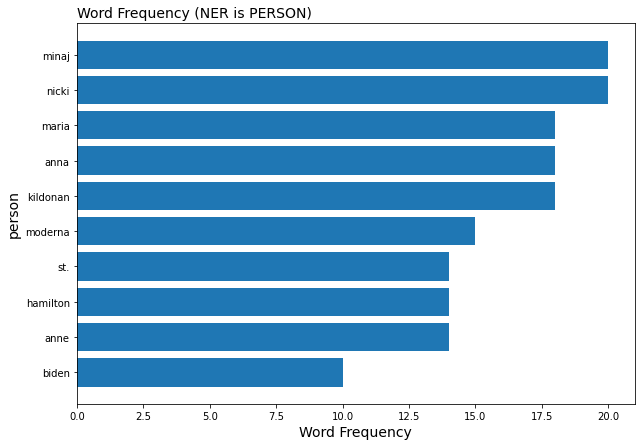

In [32]:
word = peo_count['word_lower']
count = peo_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('person', size = 14)
ax.set_xlabel('Word Frequency', size = 14)

+ Nicki Minaj: ÁæéÈ•íËàåÊ≠åÊâãÔºåÂ∞çÁñ´ËãóÂÆâÂÖ®ÊÄßÂ≠òÁñëÔºåÂºï‰æÜÂÖ∂‰ªñÂ∞àÂÆ∂ÊâπË©ï
+ biden: Joe Biden, ÁæéÂúãÁ∏ΩÁµ±ÔºåÂëºÁ±≤Â§ßÂÆ∂Êé•Á®ÆÁñ´Ëãó

## Êé¢Á¥¢ÂàÜÊûê - Sentiment

In [33]:
# ËÆÄÂèñÂ∑≤Á∂ìÂü∑Ë°åÂÆåÁï¢ÁöÑÁµêÊûú
sentiment = pd.read_csv("source/eng/sentiment_covid19vaccine.csv")
sentiment.head(5)

status_id                                               word  \
0  1439740696974409731   RT @anitakissee : This is my favorite #Covid1...   
1  1439740696974409731    https://t.co/g4VvHPIX1f https://t.co/AdzdVE2sBe   
2  1439739935959912448   RT @anitakissee : This is my favorite #Covid1...   
3  1439739935959912448    https://t.co/g4VvHPIX1f https://t.co/AdzdVE2sBe   
4  1439739587694268416   RT @StanfordMed : Allergic reactions to the n...   

  sentiment  
0  Positive  
1   Neutral  
2  Positive  
3   Neutral  
4  Positive

In [34]:
# ÁúãÊúâÂì™‰∫õÊÉÖÁ∑í
sentiment['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Very positive'], dtype=object)

In [35]:
# Áúã‰∏Ä‰∏ãÂêÑÊÉÖÁ∑íÁöÑÂàÜÂ∏É
sentiment.groupby('sentiment')['sentiment'].agg(['count'])

count
sentiment           
Negative         565
Neutral         3348
Positive         599
Very positive      1

In [36]:
# ÊääÊôÇÈñìÂä†Âà∞sentimentË£°Èù¢
tweets_df = pd.read_csv("source/eng/tweets_covid19vaccine.csv") #ÂåØË≥áÊñô
sentiment_date = pd.merge(sentiment, tweets_df[['status_id','created_at','source']], on="status_id", how='left')
sentiment_date.head(5)

status_id                                               word  \
0  1439740696974409731   RT @anitakissee : This is my favorite #Covid1...   
1  1439740696974409731    https://t.co/g4VvHPIX1f https://t.co/AdzdVE2sBe   
2  1439739935959912448   RT @anitakissee : This is my favorite #Covid1...   
3  1439739935959912448    https://t.co/g4VvHPIX1f https://t.co/AdzdVE2sBe   
4  1439739587694268416   RT @StanfordMed : Allergic reactions to the n...   

  sentiment           created_at               source  
0  Positive  2021-09-19 23:58:25  Twitter for Android  
1   Neutral  2021-09-19 23:58:25  Twitter for Android  
2  Positive  2021-09-19 23:55:24      Twitter Web App  
3   Neutral  2021-09-19 23:55:24      Twitter Web App  
4  Positive  2021-09-19 23:54:01   Twitter for iPhone

In [37]:
# Â∞áÊÉÖÁ∑íËΩâÁÇ∫ÂàÜÊï∏
def label_sentiment(row):
    if row['sentiment'] == "Positive" :
        return 1
    if row['sentiment'] == "Neutral" :
        return 0
    if row['sentiment'] == "Negative" :
        return -1

In [38]:
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row: label_sentiment(row), axis=1)
sentiment_date.head(3)

status_id                                               word  \
0  1439740696974409731   RT @anitakissee : This is my favorite #Covid1...   
1  1439740696974409731    https://t.co/g4VvHPIX1f https://t.co/AdzdVE2sBe   
2  1439739935959912448   RT @anitakissee : This is my favorite #Covid1...   

  sentiment           created_at               source  sentimentValue  
0  Positive  2021-09-19 23:58:25  Twitter for Android             1.0  
1   Neutral  2021-09-19 23:58:25  Twitter for Android             0.0  
2  Positive  2021-09-19 23:55:24      Twitter Web App             1.0

+ Âπ≥ÂùáÊÉÖÁ∑íÂàÜÊï∏ÊôÇÈñìË∂®Âã¢

In [39]:
# ËΩâÊèõÊôÇÈñìÊ†ºÂºèÁÇ∫Â§©
sentiment_date['created_at'] =  pd.to_datetime(sentiment_date['created_at']).dt.date
sentiment_count = sentiment_date.groupby(['created_at'])['sentimentValue'].mean().reset_index()
sentiment_count

created_at  sentimentValue
0  2021-09-15       -0.215385
1  2021-09-16       -0.002483
2  2021-09-17        0.023994
3  2021-09-18        0.040650
4  2021-09-19        0.051209

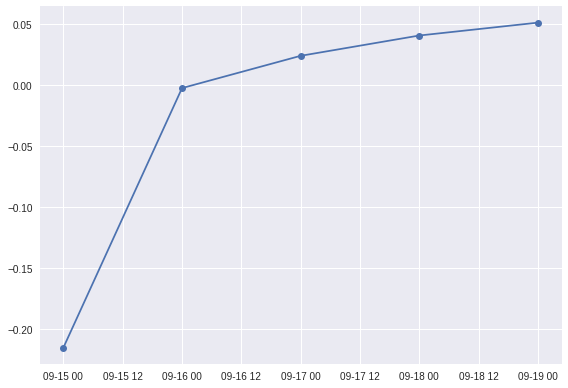

In [40]:
# Âπ≥ÂùáÊÉÖÁ∑íÂàÜÊï∏ÊôÇÈñìË∂®Âã¢
plt.style.use('seaborn')

dates = sentiment_count['created_at']
y = sentiment_count['sentimentValue']

plt.plot_date(dates, y, linestyle='solid')
plt.gcf().autofmt_xdate
plt.tight_layout()

plt.show()

## ‰∏çÂêåÁî®Êà∂Á´ØÊÉÖÁ∑íÊôÇÈñìË∂®Âã¢

In [42]:
# ÁØ©Âá∫ÂÆâÂçìÂíåËòãÊûúÁöÑÁî®Êà∂
sentiment_source = sentiment_date[sentiment_date['source'].isin(['Twitter for Android', 'Twitter for iPad'])]
# ÁÆóÊØèÂ§©ÁöÑÊÉÖÁ∑í
source_count = sentiment_source.groupby(['created_at','source'])['sentimentValue'].mean().reset_index()
source_count

created_at               source  sentimentValue
0  2021-09-15  Twitter for Android       -0.276316
1  2021-09-15     Twitter for iPad       -0.090909
2  2021-09-16  Twitter for Android        0.127090
3  2021-09-16     Twitter for iPad       -0.195122
4  2021-09-17  Twitter for Android        0.037313
5  2021-09-17     Twitter for iPad        0.111111
6  2021-09-18  Twitter for Android        0.086643
7  2021-09-18     Twitter for iPad        0.068966
8  2021-09-19  Twitter for Android        0.107692
9  2021-09-19     Twitter for iPad        0.074074

In [43]:
# spread the column
source_pivot = source_count.pivot_table(index=['created_at'],columns='source',values='sentimentValue',fill_value=0).reset_index()
source_pivot

source  created_at  Twitter for Android  Twitter for iPad
0       2021-09-15            -0.276316         -0.090909
1       2021-09-16             0.127090         -0.195122
2       2021-09-17             0.037313          0.111111
3       2021-09-18             0.086643          0.068966
4       2021-09-19             0.107692          0.074074

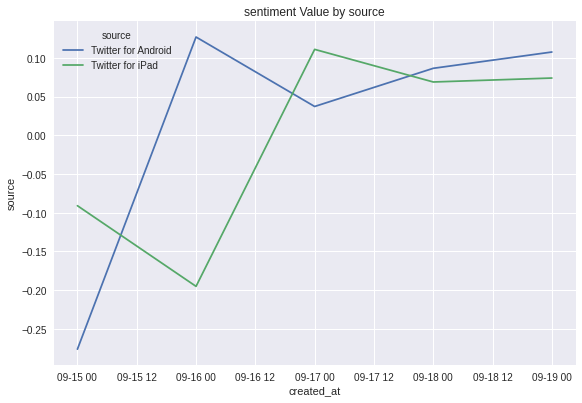

In [44]:
# ‰∏çÂêåË£ùÁΩÆÊÉÖÁ∑íÂàÜÊï∏ÊôÇÈñìË∂®Âã¢
plt.style.use('seaborn')

source_pivot.plot(x="created_at", y=["Twitter for Android", "Twitter for iPad"])
plt.gcf().autofmt_xdate
plt.tight_layout()

plt.ylabel('sentiment Value')
plt.ylabel('source')
plt.title('sentiment Value by source')

plt.show()

### Ê≠£Èù¢Ë©ûÂΩôÊé¢Á¥¢
ÊääÊ≠£Èù¢ÊñáÁ´†ÊåëÂá∫‰æÜÔºåÁúãÁúã‰ªñÂÄëÈÉΩÁî®ÁîöÈ∫ºË©û

In [45]:
# ÊåëÂá∫Ê≠£Èù¢Ë©ûÂΩô
positive = sentiment[sentiment['sentiment'].isin(['Positive', 'Verypositive'])] # 881
positive_words = pd.merge(positive,tokens,on='status_id',how='left')
positive_words.head(3)

status_id                                             word_x  \
0  1439740696974409731   RT @anitakissee : This is my favorite #Covid1...   
1  1439740696974409731   RT @anitakissee : This is my favorite #Covid1...   
2  1439740696974409731   RT @anitakissee : This is my favorite #Covid1...   

  sentiment        word_y         lemma pos     ner    word_lower  \
0  Positive            RT            rt  NN       O            rt   
1  Positive  @anitakissee  @anitakissee  NN  HANDLE  @anitakissee   
2  Positive             :             :   :       O             :   

    lemma_lower  
0            rt  
1  @anitakissee  
2             :

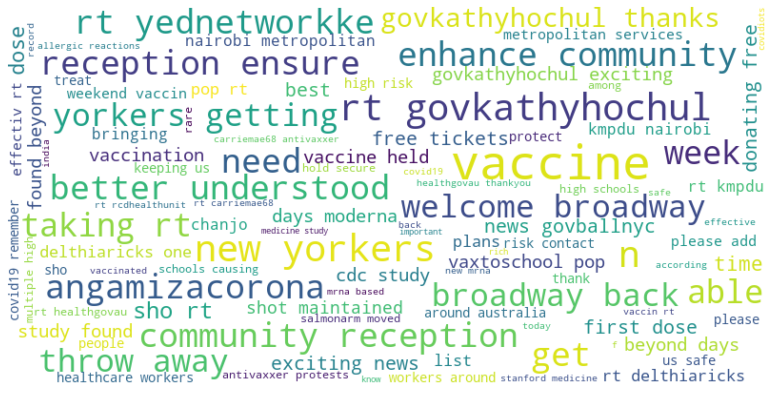

In [59]:


# ÂåØÂÖ•È†êË®≠ÁöÑstop words ‰πüÂèØ‰ª•Ëá™Ë®Ç
stop_words = set(stopwords.words('english'))
stop_words.update(["co", "covid19vaccine","https","covid","tweeting"])

# ÂèØ‰ª•Ë®≠ÂÆöÂ≠óÂûãÂ§ßÂ∞èÂíåËÉåÊôØÈ°èËâ≤
wordcloud = WordCloud(
                stopwords=stop_words,
                max_font_size=50, max_words=100,width=800, height = 400, background_color="white")\
                .generate(' '.join(positive_words['lemma_lower']))

# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

Ê≠£Èù¢ÊÉÖÁ∑íÈÉ®ÂàÜ‰æÜËá™ÊñºÈºìÂãµÊé•Á®ÆÁöÑË≤ºÊñáÔºåÂ¶ÇÁ¥êÁ¥Ñ‰∫∫„ÄåNew Yorkers„ÄçÊé•Á®ÆÁñ´Ëãó„Äåvaccine„ÄçÂèØÁç≤Âæó$100ÁæéÈáëÔºåÊàñËÄÖÊòØËß£ÈáãÁÇ∫ÁîöÈ∫ºÊé•Á®ÆÁñ´ËãóÔºåÊØîÁõ¥Êé•ÊüìÁñ´ÂèØ‰ª•ËÆì‰∫∫Áî¢ÁîüÊõ¥‰Ω≥„Äåbetter„ÄçÁöÑÊäóÈ´î„ÄÇ

In [49]:
# ÊåëÂá∫Ë≤†Èù¢Ë©ûÂΩô
negative = sentiment[sentiment['sentiment'].isin(['Negative', 'Verynegative'])] # 881
negative_words = pd.merge(negative,tokens,on='status_id',how='left')
negative_words.head(3)

status_id                                             word_x  \
0  1439736173614620672   If you refuse to get vaccinated and insist on...   
1  1439736173614620672   If you refuse to get vaccinated and insist on...   
2  1439736173614620672   If you refuse to get vaccinated and insist on...   

  sentiment  word_y   lemma  pos ner word_lower lemma_lower  
0  Negative      If      if   IN   O         if          if  
1  Negative     you     you  PRP   O        you         you  
2  Negative  refuse  refuse  VBP   O     refuse      refuse

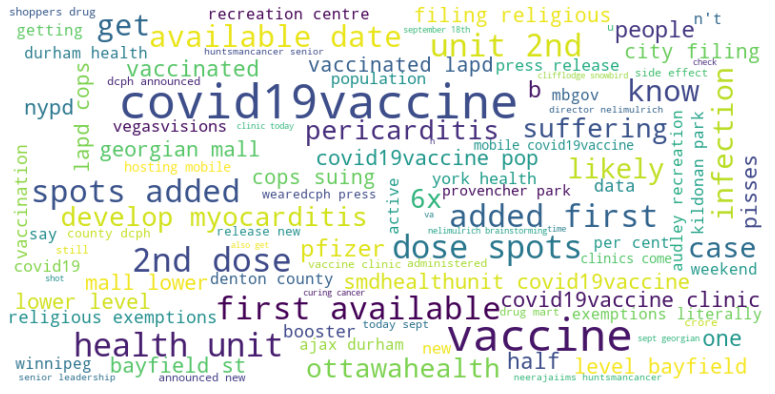

In [60]:


# ÂåØÂÖ•È†êË®≠ÁöÑstop words ‰πüÂèØ‰ª•Ëá™Ë®Ç
stop_words = set(stopwords.words('english'))
stop_words.update(["co","rt", "https","covid"])

# ÂèØ‰ª•Ë®≠ÂÆöÂ≠óÂûãÂ§ßÂ∞èÂíåËÉåÊôØÈ°èËâ≤
wordcloud = WordCloud(
                stopwords=stop_words,
                max_font_size=50, max_words=100,width=800, height = 400, background_color="white")\
                .generate(' '.join(negative_words['lemma_lower']))

# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

Ë≤†Èù¢Ë≤ºÊñáÈÉ®ÂàÜÂíåÁñ´ËãóÁöÑËôïÁΩÆÁõ∏ÈóúÔºåÂ¶ÇÊúâÂ™íÈ´îË™çÁÇ∫Á∂ìÊøüËÉΩÂäõËºÉÂ∑ÆÁöÑÂúãÂÆ∂‰∏çÊáâË©≤ÊàêÁÇ∫Ê¨°Á¥öÁñ´Ëãó„ÄåCOVID19Vaccine„ÄçË©¶Âäë„Äådoses„ÄçÁöÑÂÇæÂÄíÂ†¥„ÄÇÊàñÊòØË≠¶ÂëäÊØîËµ∑Ë≤†Êìî„Äåsuffering„ÄçÁñ´ËãóÁöÑÂâØ‰ΩúÁî®ÔºåÁõ¥Êé•ÊüìÁñ´ÁöÑÈ¢®Èö™Êõ¥Â§ß„ÄÇÂ¶ÇÁΩπÊÇ£ÂøÉËÇåÁÇé„Äåmyocarditis„ÄçÁöÑÂú∞È¢®Èö™ÊúÉÂ¢ûÂä†„ÄÇ

## TextBlob
+ Èô§‰∫ÜcoreNLP ÈÇÑÊúâ‰∏Ä‰∫õÊØîËºÉÁ∞°ÂñÆÁöÑÂ•ó‰ª∂ÂèØ‰ª•ËôïÁêÜÊñáÂ≠óÔºåÂú®ÈÄôË£°‰ªãÁ¥πtextBlob
+ ÊÉÖÁ∑íË®àÁÆó
    + polarity > 0 ÊòØÊ≠£Èù¢ÁöÑÂ≠óÔºåÂèç‰πãÊòØË≤†Èù¢ÁöÑ
    + subjectivity ‰ª£Ë°®ÊúâÂ§ö‰∏ªËßÄ
+ Á¨¨‰∏ÄÊ≠•ÊàëÂÄëÂÖàÊääÊ≠£Ë≤†Èù¢ÁöÑË≤ºÊñáÊåëÂá∫‰æÜÔºåÁÑ∂ÂæåÂÜçÁúãÁúãÈÄöÂ∏∏Ê≠£Ë≤†Èù¢ÁöÑË≤ºÊñáÈÉΩÁî®‰ªÄÈ∫ºÊ®£ÁöÑÂ≠ó

In [52]:
# Áç≤Âæó‰∏ÄÂÄãÂè•Â≠êÁöÑÊ≠£Ë≤†Èù¢ÊÉÖÁ∑í
from textblob import TextBlob ## pip install textblob
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [53]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

tweets_df['polarity'] = tweets_df['text'].apply(sentiment_calc)
tweets_df.head(3)

created_at            status_id    user_id  \
0  2021-09-19 23:58:25  1439740696974409731    MPsLife   
1  2021-09-19 23:55:24  1439739935959912448  AvgeekJoe   
2  2021-09-19 23:54:01  1439739587694268416   s_anand1   

                                           user_name  \
0                                            üêß MP üá∫üá∏   
1  joe a. kanzlar, VACCINATED & PLEASE BE VAXXED ...   
2                                            S.Anand   

                                                text  favourites  retweet  \
0  RT @anitakissee: This is my favorite #Covid19v...           0        4   
1  RT @anitakissee: This is my favorite #Covid19v...           0        4   
2  RT @StanfordMed: Allergic reactions to the new...           0       23   

                source  polarity  
0  Twitter for Android  0.392857  
1      Twitter Web App  0.392857  
2   Twitter for iPhone  0.218182

In [54]:
# ÊåëÂá∫Ê≠£Ë≤†Èù¢ÊÉÖÁ∑í
positive = tweets_df.loc[tweets_df['polarity'] > 0][['status_id','polarity']]
negative = tweets_df.loc[tweets_df['polarity'] < 0][['status_id','polarity']]

In [55]:
# ÂéªÈô§ÂÅúÁî®Â≠óÂíåÊ®ôÈªûÁ¨¶Ëôü


stop_words = set(stopwords.words('english'))
filter_tokens = tokens[~tokens.word.isin(list(stop_words))] # 82548 => 63024
filter_tokens = filter_tokens[filter_tokens.lemma_lower.str.isalpha()] # 63024 => 36778

In [56]:
filter_tokens

status_id       word      lemma  pos          ner word_lower  \
0      1439740696974409731         RT         rt   NN            O         rt   
3      1439740696974409731       This       this   DT            O       this   
6      1439740696974409731   favorite   favorite   JJ            O   favorite   
8      1439740696974409731      video      video   NN            O      video   
10     1439740696974409731     TikTok     TikTok  NNP            O     tiktok   
...                    ...        ...        ...  ...          ...        ...   
72163  1438181781564493824  September  September  NNP         DATE  september   
72167  1438181781564493824   Canadian   canadian   JJ  NATIONALITY   canadian   
72168  1438181781564493824     Mental     Mental  NNP            O     mental   
72169  1438181781564493824     Health     Health  NNP            O     health   
72170  1438181781564493824    Associa    Associa  NNP            O    associa   

      lemma_lower  
0              rt  
3            this  
6        favorite  
8           video  
10         tiktok  
...           ...  
72163   september  
72167    canadian  
72168      mental  
72169      health  
72170     associa  

[32366 rows x 7 columns]

In [62]:
positive_words = pd.merge(positive,filter_tokens[['status_id','lemma_lower']],on='status_id',how='left')
negative_words = pd.merge(negative,filter_tokens[['status_id','lemma_lower']],on='status_id',how='left')

Áúã‰∏Ä‰∏ãÊ≠£Èù¢ÁöÑÂè•Â≠êÈÉΩÁî®ÁîöÈ∫ºÊ®£ÁöÑË©û

In [63]:
positive_words.groupby(['lemma_lower'])['lemma_lower'] \
                         .count() \
                         .reset_index(name='count') \
                         .sort_values(['count'], ascending=False) \
                         .head(10)

lemma_lower  count
1352           rt   1229
373         covid    718
966       medical    477
898          list    473
873       leaders    473
551       experts    472
605     following    471
185         black    470
818    interested    470
1623  trustworthy    469

In [64]:
# Áúã‰∏Ä‰∏ãË≤†Èù¢ÁöÑÈÉΩÊòØÁîöÈ∫ºÂ≠ó
negative_words.groupby(['lemma_lower'])['lemma_lower'] \
                         .count() \
                         .reset_index(name='count') \
                         .sort_values(['count'], ascending=False) \
                         .head(10)

lemma_lower  count
673          rt    154
123     clinics     43
847     vaccine     42
796       today     40
592          pm     39
158       covid     35
785        this     32
563        park     31
335      health     30
579      people     27

### Ë£úÂÖÖÔºöÂÖ∂‰ªñËã±ÊñáËôïÁêÜÂ•ó‰ª∂

#### emoji
+  emoji ËΩâËã±ÊñáÂ≠ó

In [66]:
# emoji to text
import emoji ## pip install emoji
print(emoji.demojize('Python is üëç'))

Python is :thumbs_up:


#### vaderSentiment
+ ÂàÜÊûêËã±ÊñáÂè•Â≠êÊÉÖÁ∑í

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # pip install vaderSentiment

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as üíò and üíã and üòÅ",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
At least it isn't a horrible book.------------------------------- {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.431}
The book was only kind of good.---------------------------------- {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.3832}
The plot was good, but the characters are uncompelling and the dialog is not great. {'neg': 0.327, 'neu': 0.579, 'pos': 0.094, 'compound': -0.7042}
Today SUX!------------------------------------------------------- {'neg': 0.779, 'neu': 0.221, 'pos': 0.0, 'compound': -0.5461}
Today only kinda sux! But I'll get by, lol----------------------- {'neg': 0.127, 'neu': 0.556, 'pos': 0.317, 'compound': 0.5249}
Make sure you :) or :D today!------------------------------------ {'neg': 0.0, 'neu': 0.

#### sentimentpy
+ github: https://github.com/trinker/sentimentpy
+ Ë´ãÁî®ÈÄôÁ®ÆÊñπÂºèÂÆâË£ù `pip install git+https://github.com/trinker/sentimentpy`

In [69]:
# ÊääÂè•Â≠êÊñ∑ÈñãÔºåÂéªÈô§ÁµêÂ∞æÁ©∫ÁôΩÁ¨¶Ëôü
import sentimentpy.split_sentences as ss

s = [
    'I like carrots too mrs. dunbar. Well let\'s go to 100th st. around the corner.   ',
    'Hello Dr. Livingstone.  How are you?',
    'This is sill an incomplete thou.'
]

ss.split_sentences(s)

/usr/local/anaconda3/envs/test/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


['I like carrots too mrs. dunbar.',
 "Well let's go to 100th st. around the corner.",
 'Hello Dr. Livingstone.',
 'How are you?',
 'This is sill an incomplete thou.']

### Áõ∏ÈóúÂèÉËÄÉÈÄ£Áµê
+ Áõ∏ÈóúÊñá‰ª∂
    + coreNLP
        + CoreNLPClient parameter
        + https://stanfordnlp.github.io/stanza/client_properties.html
    + tweetpy
        + API.search
        + https://docs.tweepy.org/en/v3.5.0/api.html#help-methods
        + API.search input output
        + https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets

+ ÂèÉËÄÉcode
    + ÊäìÂèñtwitter table
    + https://amandeepsaluja.com/getting-twitter-keyword-data-in-table-format-using-python/